# Lesson 6: Loading data from files (Enthought course)

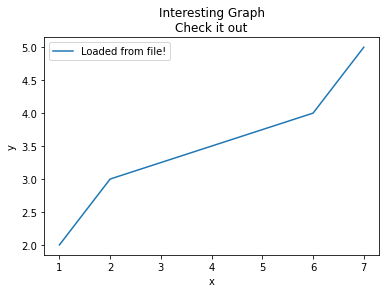

In [11]:
import matplotlib.pyplot as plt
import csv
import os

x = []
y = []
os.listdir()
os.getcwd()
with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

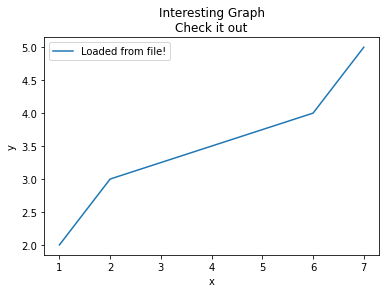

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
x, y = np.loadtxt('example.txt', delimiter=',', unpack=True)
plt.plot(x,y, label='Loaded from file!')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

In [13]:
import numpy as np
import os
x= np.loadtxt('float_data.txt')
print(x)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [15]:
import numpy as np
import os
x= np.loadtxt('float_data_with_header.txt', skiprows=1)
print(x)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [ ]:
import numpy as np
import os
x= np.loadtxt('float_data_with_header.txt', skiprows=1)
print(x)

In [40]:
import numpy as np
import os
x= np.loadtxt('complex_data_file.txt', delimiter=',', comments='%', skiprows=1, usecols=(0,1,2,4), dtype=int)
print(x)


[[   1    1 2000   30]
 [   2    1 2000   41]
 [   4    1 2000   55]
 [   5    1 2000   78]
 [   6    1 2000  134]
 [   7    1 2000   42]]


# structured_array exercise

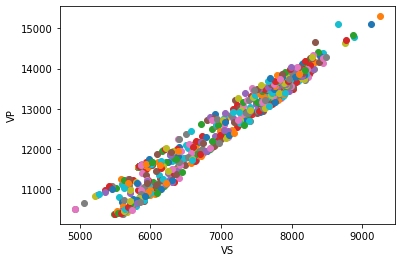

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Open the file.
log_file = open('short_logs.crv')

# 1.Create a dtype from the names in the file header.
# Since I don't know the numbers of culomns in the file:
# The readline() method returns a list containing a line in the file as a list item, 
# the defualt for the first line is -1(no need to write somthing)
header = log_file.readline()
header

#the list become an array:
log_names = header.split()
log_names= np.array(log_names)
len(log_names)

# Construct the array "dtype" that describes the data.  All fields
# are 8 byte (64 bit) floating point.

fields = list(zip(log_names, ['f8']*len(log_names)))


#2. Use loadtxt to load the data into a structured array.
logs = np.loadtxt(log_file, dtype=fields)

#3. Make a 2D, float64 view of the data.
#   The -1 value for the row shape means that numpy should
#   make this dimension whatever it needs to be so that
#   rows*cols = size for the array.
values = logs.view('f8')
values.shape = -1, len(fields)

# 4. Relace any values that are -999.25 with NaNs.
values[values==-999.25] = np.NaN

values

# 5. Make a mask (ma.) for all the rows that don't have any missing values:
#    Pull out these samples from the logs array into a separate array.
data_mask = np.ma.array(values.all())
good_logs = logs[data_mask]

# 6. Plot VP vs. VS for the "complete rows.
plt.plot(good_logs['VS'], good_logs['VP'], 'o')
plt.xlabel('VS')
plt.ylabel('VP')
plt.show()




# dow_selection excercise

the dow volume was above 5.5 billion on 18 day this year.
[ 12  13  15  51  54 123 125 129 131 132 134 135 136 137 139 140 141 145]


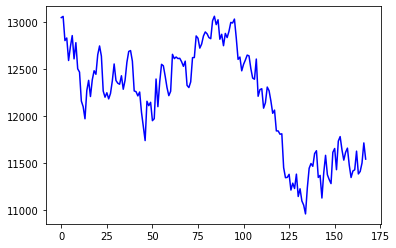

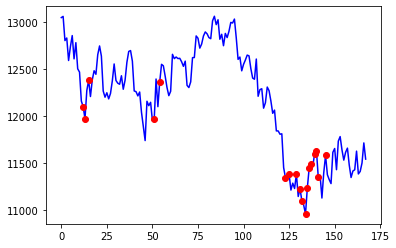

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Open the file.
dow_file = np.loadtxt('dow.csv', delimiter=',')

# mask column 4 which is the volume and find which row have high volume greater than 5.5 bilion

High_volume= dow_file[:, 4]> 5.5e9

# how many days the volume was greater than 5.5 billions?
High_volume_days = sum(High_volume)
print("the dow volume was above 5.5 billion on" \
     " %d day this year." % High_volume_days)

# Find the index of every row=day where the volume>5.5 billions, use where command:
High_vol_index = np.where(High_volume)[0]
print(High_vol_index)

# plot the adjust close (culummn 5) for each day in 2008: x=indexes=days
plt.plot(dow_file[:, 5] , 'b-')
plt.show()


# olot the days where the volume was high in red dots = high_vol_index
plt.plot(dow_file[:, 5] , 'b-', High_vol_index, dow_file[High_vol_index,5], 'ro')
plt.show()

# wind_statistic

In [68]:
import numpy as np
import os
import matplotlib.pyplot as plt

file = np.loadtxt('wind.data', dtype=int)
#
file=np.array(file)
file.mean()
file.max()
file.min()
file.std()


16.020575228703112

In [59]:
# 3. calculate min windspeed of each location=column over all days:
# axis=0 is move along the columns

min_location = np.min(file, axis=0)
print(min_location)

# 4.calculate mean, min ans max windspeed of each day=rows over all locations:
#axis= 1 is the rows
min_day =np.min(file, axis=1)
print(min_day)
len(min_day)

[61  1  1  0  0  1  0  0  0  0  0  0  0  0  0]
[1 1 1 ... 8 9 9]


6574

In [74]:
# 5. find the location which has the greatest windspead on each day:

max_location = np.max(file, axis=1)
print(max_location)
file.argmax()
        
        


[61 61 61 ... 78 78 78]


93135

NameError: name 'High_volume' is not defined

# test:

In [62]:
a=np.array([1,2,3,4,5,6,7])
b=(a<4)&(a%2==0)
print(b)

[False  True False False False False False]


In [60]:
a=np.array([1,2,3,4,5,6,7])
b=(a<4)&(a%2==0)
c=a[b]
print(c)

[2]


In [61]:
a=np.array([1,2,3,4,5,6,7])
b=np.where(a<4)
print(b)

(array([0, 1, 2], dtype=int64),)
